# Mini-Assignment 6

<b>Part 1: Project Proposal</b>

<p>For our corpus, we chose the Outlander series, written by Diana Gabaldon. The first book in the series was published in 1991. The story follows Claire, a young British woman who finds herself thrown back in time (17th century Scotland) and captured by Scottish highlanders. The book series goes on to intertwine the fictional lives of Claire, her husband Jamie, and real historical events such as the Jacobite Rising. In March 2018, Diana Gabaldon wrote an article discussing the themes for each of her novels in the popular Outlander series. For each book, she sums of the theme in one word; Book 1 is Love, Book 2 is Marriage, Book 3 is Identity, Book 4 is Family, Book 5 is Community, Book 6 is Loyalty, Book 7 is Nexus and Book 8 is Forgiveness. We will use topic modelling to each of the books to see if the themes that Gabaldon describe emerge in our analysis. Additionally, we will use topic modelling on the entire corpus to see what themes emerge for the entire series, a series which has famously avoided being categorized into one genre or another. Our corpus is already compiled. Each book has been separated and converted into individual text files. There are currently 8 texts in the series and each text contains between 29,000 and 50,000 words. The total count for all of the books is 3,245,008 words and 42,849 unique word forms.</p> 

<b>References</b>

Gabaldon, Diana. (2018, March 21). <i>One word speaks volumes: Themes of the novels.</i> Retrieved from http://www.dianagabaldon.com/resources/what-i-do/one-word-speaks-volumes/

<b>Part 2: Voyant Visualization</b>

I imported the first book in the Outlander series into Voyant. The following is a visualization of the Links tool. 

In [23]:
from IPython.display import IFrame

In [24]:
IFrame('https://voyant-tools.org/?corpus=d97b8513b8fcbe59f2473b5cf0c58d4c&stopList=keywords-7fd0116a5dff49d8857ba4fc8dd6966b&query=jamie&query=hand&query=like&mode=corpus&view=CollocatesGraph', width=300, height=300)

The larger the bubble, the higher the frequency. Jamie (1182) is clearly the most frequent word in the corpus (the main character's love interest), followed by hand (674); like (670); head (593); time (557). The blue bubbles are keywords and collocates are shown in orange with connecting lines. Jamie is most often collocated with looked, head, hand, aye, and dougal. Dougal is an interesting collocation because Dougal is one of the other main characters in the text. Also there's a lot of body parts (hand, arm, head) which makes me think that Gabaldon likes to describe Jamie's physical appearance quite a bit. 

<b>Part 3: Python Visualization</b>

The first step is to import the Outlander text. I am working with the first book in the series, Outlander. 

In [25]:
import glob
textFiles = glob.glob("outlander/*txt")
textFiles

['outlander/1outlander.txt']

In past assignments, I have had trouble accessing my text files. With some help from my peers, I was able to access my text files and print a sample to make sure! 

In [26]:
import os
directory = "outlander"
with open("outlander/1outlander.txt", "r", encoding="utf-8-sig") as f:
   outlanderString = f.read()
print(outlanderString[:242])

OUTLANDER

People disappear all the time. Ask any policeman. Better yet, ask a journalist. Disappearances are bread-and-butter to journalists.

Young girls run away from home. Young children stray from their parents and are never seen again. 


Next, I'm going to import NLTK which will help my prepare my text file (tokenize, add stopwords, make everything lowercase). 

In [27]:
import nltk

In [28]:
with open("outlander/1outlander.txt", "r") as f:
    outlanderString = f.read()

# simple lowercase tokenize
outlanderTokensLowercase = nltk.word_tokenize(outlanderString.lower())

# filter out tokens that aren't words
outlanderWordTokensLowercase = [word for word in outlanderTokensLowercase if word[0].isalpha()]

stopwords = nltk.corpus.stopwords.words("English") # load stopwords

# filter words that are alphabetic and not in stopword list
words = [word.lower() for word in outlanderWordTokensLowercase if word[0].isalpha() and not word.lower() in stopwords]

# determine frequencies
outlanderWordTokensLowercaseFreqs = nltk.FreqDist(words)

# preview the top 20 frequencies
outlanderWordTokensLowercaseFreqs.tabulate(20)

   said      ye   jamie    back     one   could  though    hand    like   would    head    time thought    face    well     see     man   still    eyes  dougal 
   1700    1439    1417    1010    1007     754     668     654     643     635     585     539     531     526     507     506     506     499     487     454 


Now it's time to make a graph using the top 25 most frequent words! 

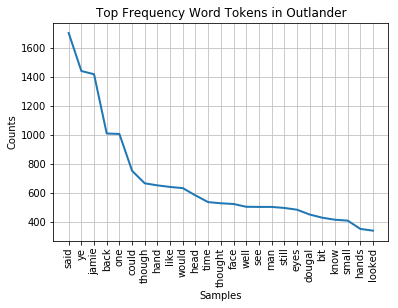

In [29]:
%matplotlib inline

# plot the top frequency words in a graph
outlanderWordTokensLowercaseFreqs.plot(25, title="Top Frequency Word Tokens in Outlander")